In [43]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [54]:
import os
import glob
import matplotlib
%matplotlib notebook
# print(matplotlib.rcParams)
# matplotlib.rcParams['figure.figsize'] = [16, 9]
import matplotlib.pyplot as plt

data_path = os.path.join(os.getcwd(), 'data')
file_list = sorted(glob.glob(data_path + "/*fits"))
for _file in file_list:
    print(_file)

/data/simon/documentation/soar/general_documentation/jupyter-notebooks/pipeline_development/regis_data_review/data/cxtract_LTT3864_400m1.fits.0001.fits
/data/simon/documentation/soar/general_documentation/jupyter-notebooks/pipeline_development/regis_data_review/data/cxtract_LTT3864_400m2.fits.0001.fits
/data/simon/documentation/soar/general_documentation/jupyter-notebooks/pipeline_development/regis_data_review/data/cxtract_SN2019cxt_400m1.fits.0001.fits
/data/simon/documentation/soar/general_documentation/jupyter-notebooks/pipeline_development/regis_data_review/data/cxtract_SN2019cxt_400m2.fits.0001.fits
/data/simon/documentation/soar/general_documentation/jupyter-notebooks/pipeline_development/regis_data_review/data/tran_SN2019cxt_400m2.fits
/data/simon/documentation/soar/general_documentation/jupyter-notebooks/pipeline_development/regis_data_review/data/trans_SN2019cxt_400m1.fits
/data/simon/documentation/soar/general_documentation/jupyter-notebooks/pipeline_development/regis_data_re

<IPython.core.display.Javascript object>


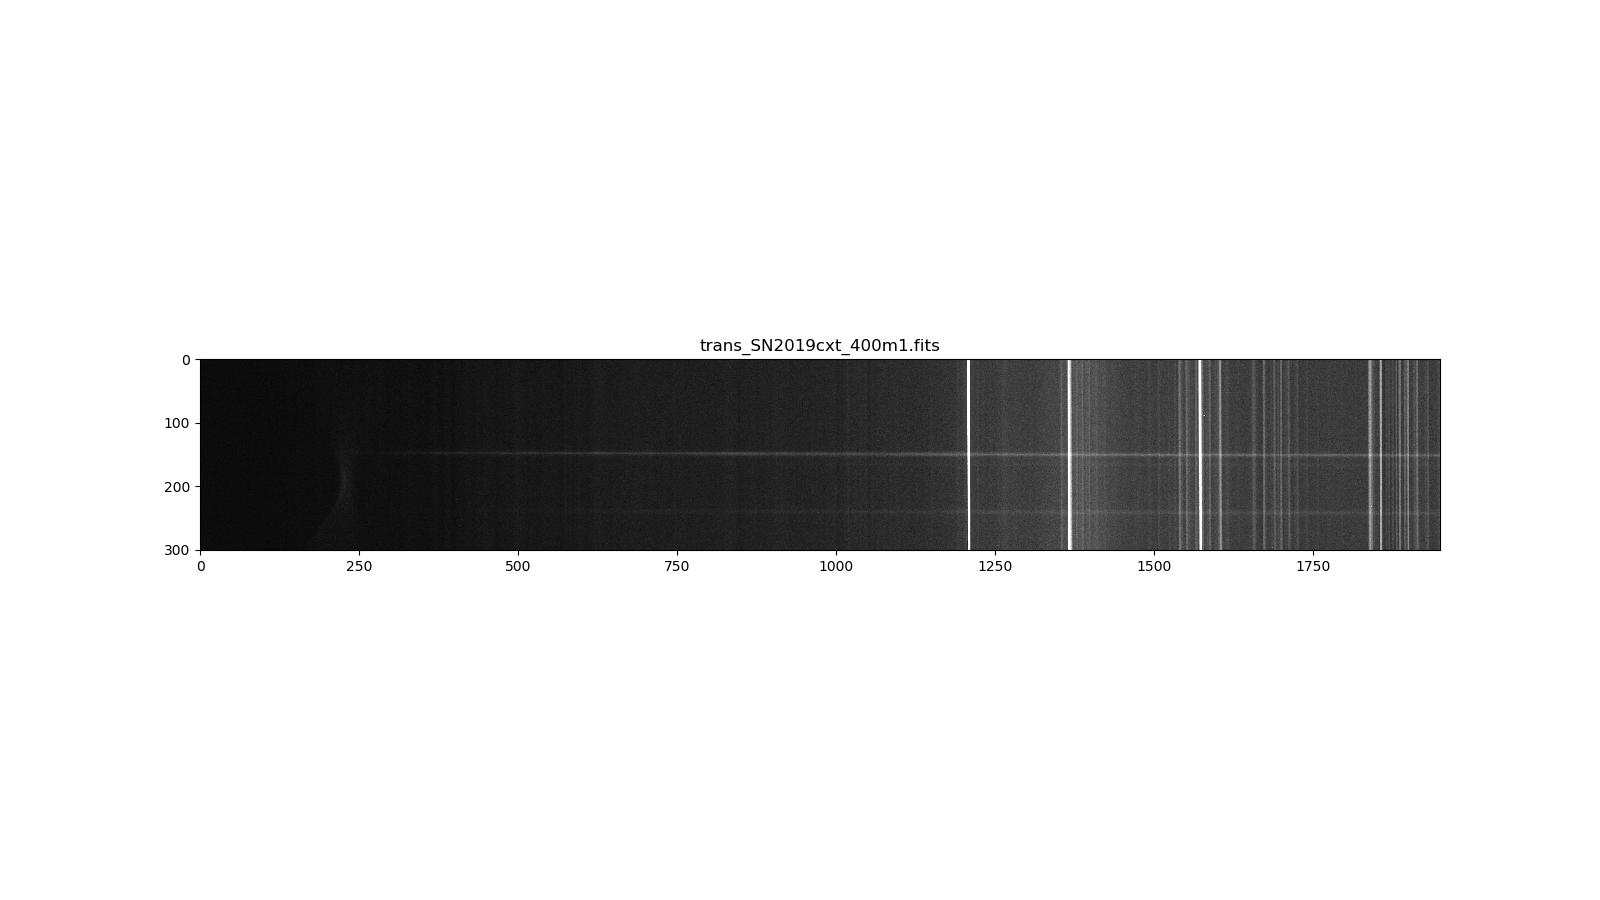

<IPython.core.display.Javascript object>


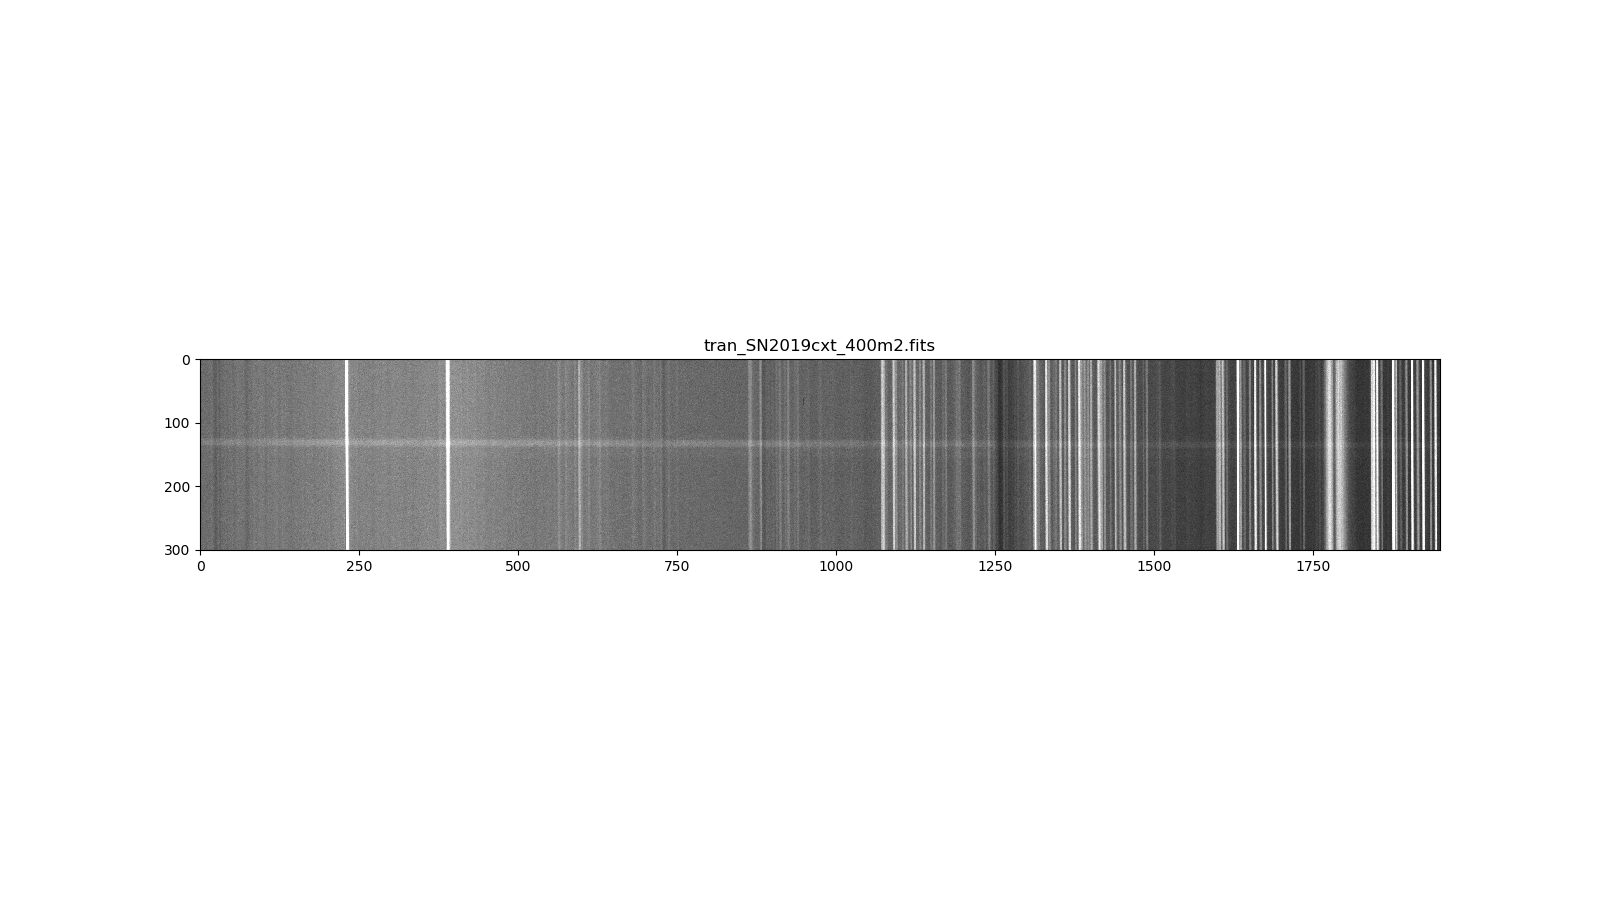

In [55]:
from ccdproc import CCDData

for _file in ['trans_SN2019cxt_400m1.fits', 'tran_SN2019cxt_400m2.fits']:
    ccd = CCDData.read(os.path.join(data_path, _file), unit='adu')

    fig, ax = plt.subplots()
    ax.set_title(_file)

    ax.imshow(ccd.data, cmap='gray', clim=(-8, 300))
    plt.show()

In [73]:
from goodman_pipeline.wcs import WCS
wcs = WCS()
files_1d_list = [file for file in file_list if 'tran' not in file]

files_400m1 = [file for file in files_1d_list if '400m1' in file]
files_400m2 = [file for file in files_1d_list if '400m2' in file]
print(files_400m1)
print(files_400m2)
import numpy as np
# wcs?

['/data/simon/documentation/soar/general_documentation/jupyter-notebooks/pipeline_development/regis_data_review/data/cxtract_LTT3864_400m1.fits.0001.fits', '/data/simon/documentation/soar/general_documentation/jupyter-notebooks/pipeline_development/regis_data_review/data/cxtract_SN2019cxt_400m1.fits.0001.fits', '/data/simon/documentation/soar/general_documentation/jupyter-notebooks/pipeline_development/regis_data_review/data/wecfzsto_0020_SN2019cxt_400m1_ws_1.fits']
['/data/simon/documentation/soar/general_documentation/jupyter-notebooks/pipeline_development/regis_data_review/data/cxtract_LTT3864_400m2.fits.0001.fits', '/data/simon/documentation/soar/general_documentation/jupyter-notebooks/pipeline_development/regis_data_review/data/cxtract_SN2019cxt_400m2.fits.0001.fits', '/data/simon/documentation/soar/general_documentation/jupyter-notebooks/pipeline_development/regis_data_review/data/wecfzsto_0001_SN2019cxt_400m2-16-04-2019T03-42-01.fits']


<IPython.core.display.Javascript object>


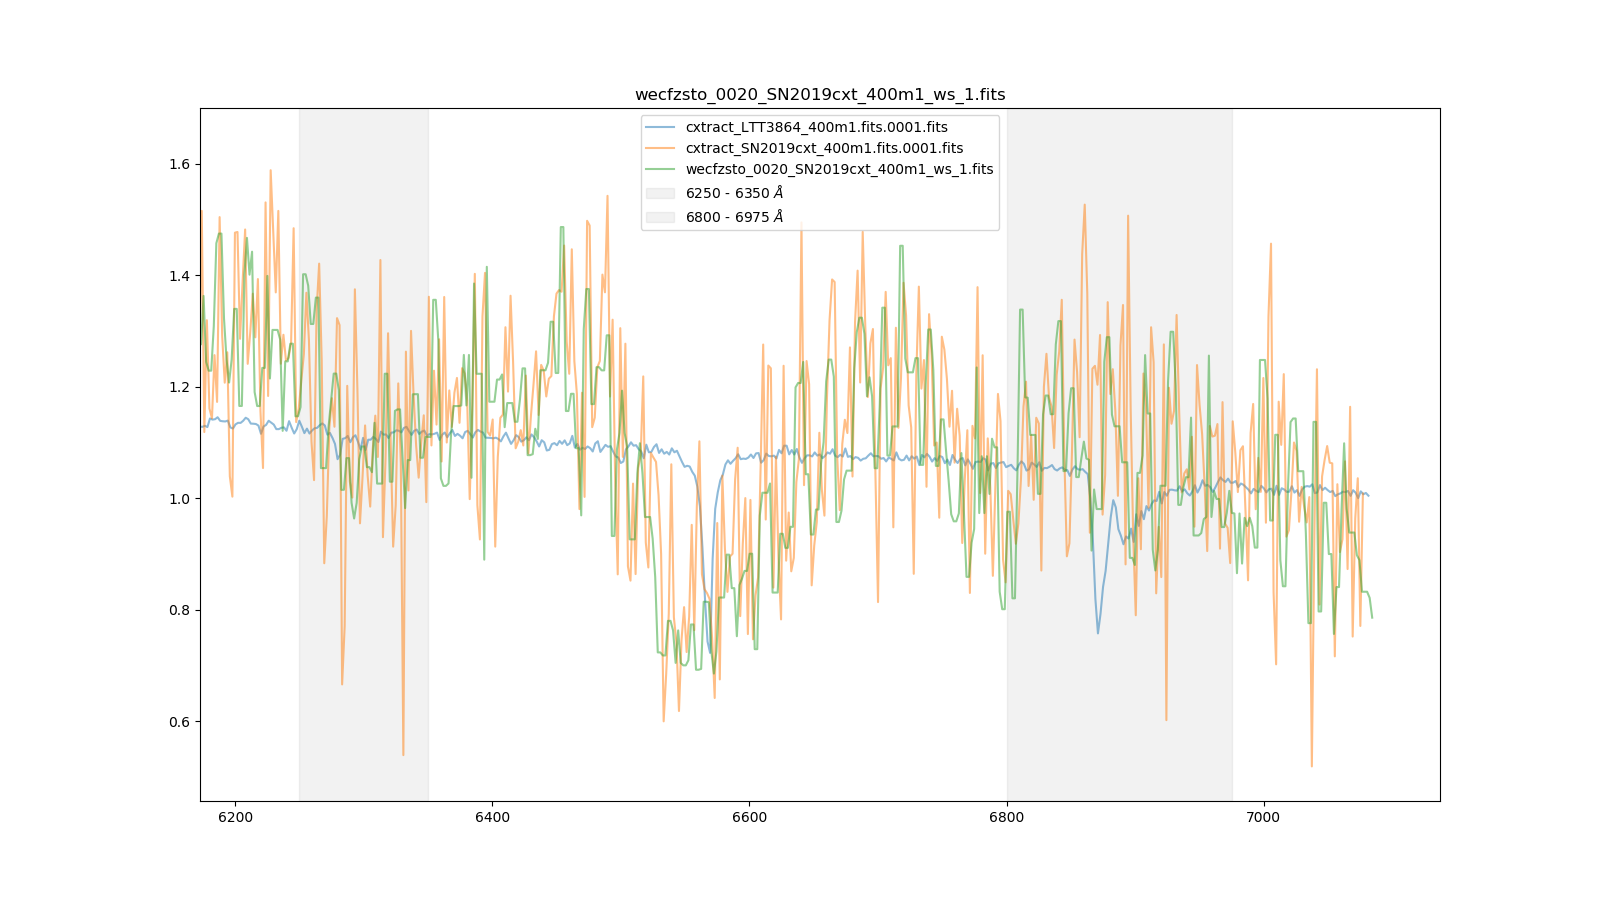

[16:46:24][I]: Reading Linear Solution
[16:46:24][I]: Reading Linear Solution
[16:46:24][I]: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
[16:46:24][I]: Reading Linear Solution


cxtract_LTT3864_400m1.fits.0001.fits
cxtract_SN2019cxt_400m1.fits.0001.fits
wecfzsto_0020_SN2019cxt_400m1_ws_1.fits
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


In [75]:
fig, ax = plt.subplots()
ax.axvspan(6250, 6350, color='k', alpha=0.05, label=r'6250 - 6350 $\AA$')
ax.axvspan(6800, 6975, color='k', alpha=0.05, label=r'6800 - 6975 $\AA$')
for _file in files_400m1:
    file_only = os.path.basename(_file)
    print(file_only)
    ccd = CCDData.read(_file, unit='adu')
#     print(ccd.data.shape)
    ccd.data = ccd.data/ np.median(ccd.data)
    

    ax.set_title(file_only)
    
    wav, inten = wcs.read(ccd=ccd)
    ax.plot(wav, inten, label=file_only, alpha=.5)
#     ax.plot(ccd.data, label=_file, alpha=0.4)
    ax.legend()
plt.show()

<IPython.core.display.Javascript object>


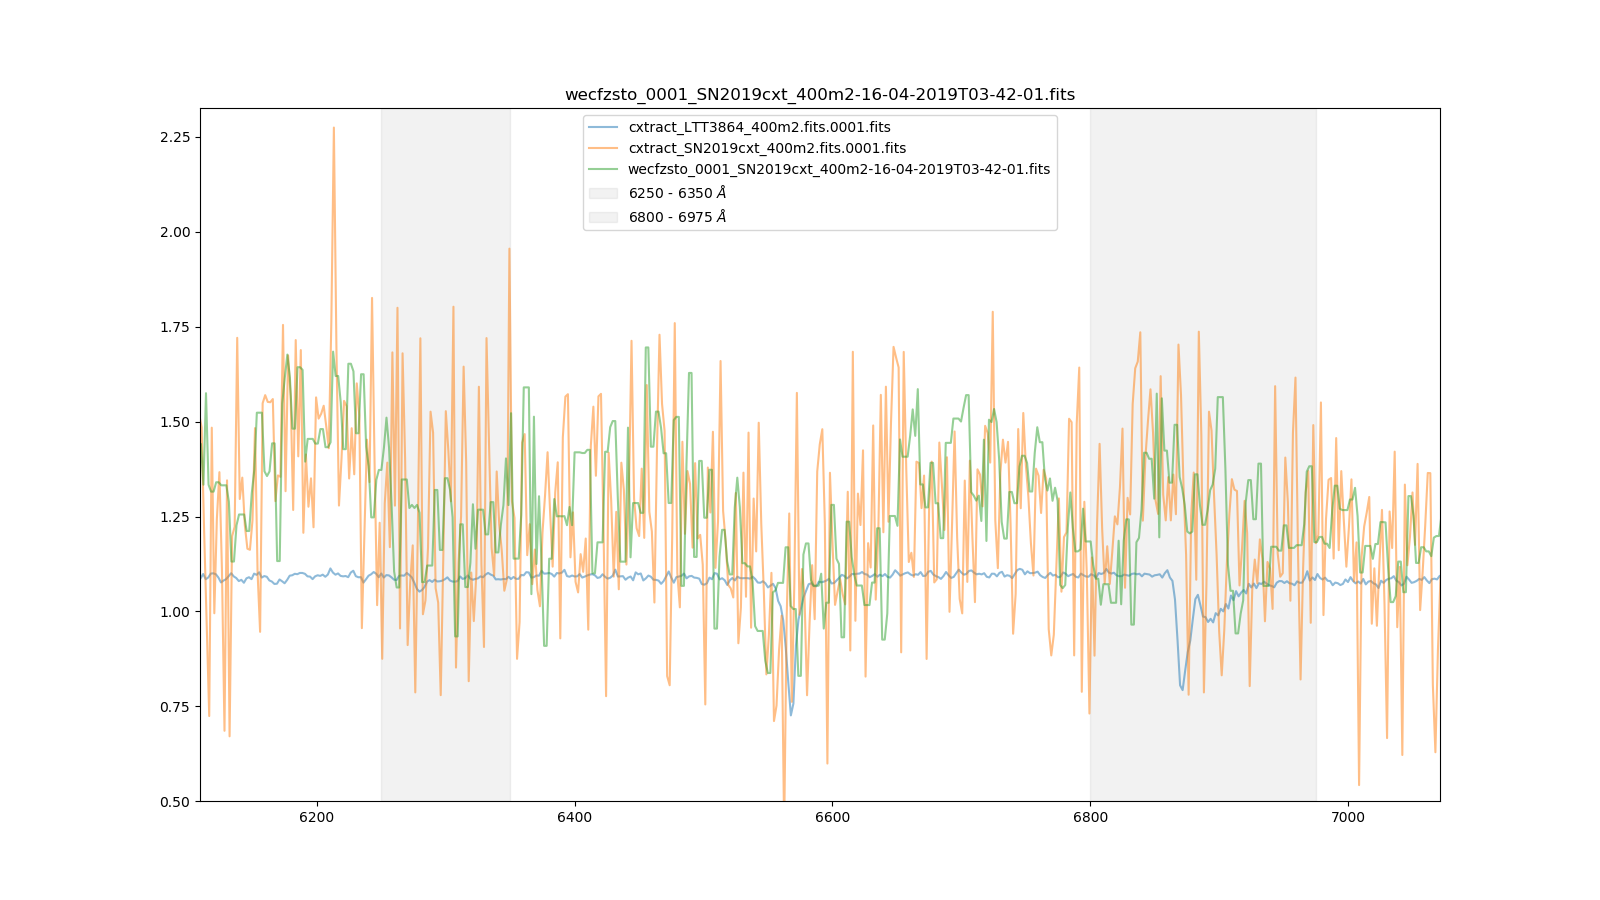

[16:47:35][I]: Reading Linear Solution
[16:47:35][I]: Reading Linear Solution
[16:47:35][I]: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
[16:47:35][I]: Reading Linear Solution


cxtract_LTT3864_400m2.fits.0001.fits
cxtract_SN2019cxt_400m2.fits.0001.fits
wecfzsto_0001_SN2019cxt_400m2-16-04-2019T03-42-01.fits
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


In [76]:
fig, ax = plt.subplots()
ax.axvspan(6250, 6350, color='k', alpha=0.05, label=r'6250 - 6350 $\AA$')
# ax.axvspan(6450, 6600, color='k', alpha=0.05, label=r'6450 - 6600 $\AA$')
ax.axvspan(6800, 6975, color='k', alpha=0.05, label=r'6800 - 6975 $\AA$')
for _file in files_400m2:
    file_only = os.path.basename(_file)
    print(file_only)
    ccd = CCDData.read(_file, unit='adu')
#     print(ccd.data.shape)
    ccd.data = ccd.data/ np.median(ccd.data)
    
    ax.set_title(file_only)
    
    wav, inten = wcs.read(ccd=ccd)
    ax.plot(wav, inten, label=file_only, alpha=.5)
#     ax.plot(ccd.data, label=_file, alpha=0.4)
    ax.legend()
plt.show()